In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = 'https://media.githubusercontent.com/media/nishp763/SCS-ML-3253---Final-Project/master/dataset.csv'

In [0]:
df = pd.read_csv(url, decimal=",", parse_dates=["date"],infer_datetime_format=True).drop_duplicates()

In [4]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
df.head(3)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31


In [0]:
df.columns = df.columns.str.replace(' ', '_')

In [7]:
df.corr()

,%_Iron_Feed,%_Silica_Feed,Starch_Flow,Amina_Flow,Ore_Pulp_Flow,Ore_Pulp_pH,Ore_Pulp_Density,Flotation_Column_01_Air_Flow,Flotation_Column_02_Air_Flow,Flotation_Column_03_Air_Flow,Flotation_Column_04_Air_Flow,Flotation_Column_05_Air_Flow,Flotation_Column_06_Air_Flow,Flotation_Column_07_Air_Flow,Flotation_Column_01_Level,Flotation_Column_02_Level,Flotation_Column_03_Level,Flotation_Column_04_Level,Flotation_Column_05_Level,Flotation_Column_06_Level,Flotation_Column_07_Level,%_Iron_Concentrate,%_Silica_Concentrate
%_Iron_Feed,1.000000,-0.971876,0.027869,-0.088128,0.161138,0.007687,-0.125657,-0.061945,-0.169021,-0.061783,-0.137072,0.121718,-0.042435,-0.016156,0.029678,0.021090,0.015329,0.016646,0.023928,0.003890,0.026122,0.055844,-0.077179
%_Silica_Feed,-0.971876,1.000000,-0.016089,0.078553,-0.151053,0.008033,0.104287,0.091544,0.182428,0.083975,0.160606,-0.130858,0.067505,0.045203,-0.038294,-0.037010,-0.022672,-0.034167,-0.043942,-0.019580,-0.046484,-0.044403,0.072676
Starch_Flow,0.027869,-0.016089,1.000000,0.254749,0.042962,0.263497,0.225990,0.191501,0.187065,0.183637,0.093660,-0.088208,0.215850,0.194944,-0.294159,-0.278174,-0.301586,-0.011927,-0.054836,-0.071543,-0.037721,0.070058,-0.066813
Amina_Flow,-0.088128,0.078553,0.254749,1.000000,0.212597,0.124025,0.655352,0.111560,0.123346,0.102168,0.015594,-0.044929,0.120076,0.079674,-0.268700,-0.234701,-0.287252,-0.179816,-0.211502,-0.197984,-0.167756,-0.110742,0.156981
Ore_Pulp_Flow,0.161138,-0.151053,0.042962,0.212597,1.000000,0.117989,0.012733,-0.138482,-0.119294,-0.141355,-0.156356,0.166792,-0.159391,-0.141197,-0.008920,-0.008476,-0.054637,-0.010723,0.001238,-0.016946,0.015902,0.082779,0.008497
Ore_Pulp_pH,0.007687,0.008033,0.263497,0.124025,0.117989,1.000000,0.115964,0.162613,0.144379,0.192966,0.150005,-0.139962,0.113713,0.174494,-0.166373,-0.154349,-0.140600,0.045292,0.011757,-0.075478,0.018084,0.192443,-0.147211
Ore_Pulp_Density,-0.125657,0.104287,0.225990,0.655352,0.012733,0.115964,1.000000,-0.004740,0.026546,-0.031353,-0.097692,0.043593,-0.030515,-0.052175,-0.111556,-0.093037,-0.149803,-0.086387,-0.139891,-0.099982,-0.085164,0.015150,0.047002
Flotation_Column_01_Air_Flow,-0.061945,0.091544,0.191501,0.111560,-0.138482,0.162613,-0.004740,1.000000,0.848168,0.954496,0.474472,-0.204492,0.663089,0.646716,-0.442249,-0.426596,-0.372320,-0.063151,-0.092814,-0.119449,-0.111736,0.098089,-0.219076
Flotation_Column_02_Air_Flow,-0.169021,0.182428,0.187065,0.123346,-0.119294,0.144379,0.026546,0.848168,1.000000,0.860348,0.433952,-0.182716,0.588680,0.578528,-0.432858,-0.423850,-0.366171,-0.075872,-0.112315,-0.118141,-0.113640,0.058184,-0.167259
Flotation_Column_03_Air_Flow,-0.061783,0.083975,0.183637,0.102168,-0.141355,0.192966,-0.031353,0.954496,0.860348,1.000000,0.490449,-0.225975,0.659617,0.649380,-0.441468,-0.421729,-0.365273,-0.047825,-0.065020,-0.100848,-0.086232,0.099659,-0.218834


In [8]:
df.isnull().any()

date                            False
%_Iron_Feed                     False
%_Silica_Feed                   False
Starch_Flow                     False
Amina_Flow                      False
Ore_Pulp_Flow                   False
Ore_Pulp_pH                     False
Ore_Pulp_Density                False
Flotation_Column_01_Air_Flow    False
Flotation_Column_02_Air_Flow    False
Flotation_Column_03_Air_Flow    False
Flotation_Column_04_Air_Flow    False
Flotation_Column_05_Air_Flow    False
Flotation_Column_06_Air_Flow    False
Flotation_Column_07_Air_Flow    False
Flotation_Column_01_Level       False
Flotation_Column_02_Level       False
Flotation_Column_03_Level       False
Flotation_Column_04_Level       False
Flotation_Column_05_Level       False
Flotation_Column_06_Level       False
Flotation_Column_07_Level       False
%_Iron_Concentrate              False
%_Silica_Concentrate            False
dtype: bool

In [9]:
df.describe()

,%_Iron_Feed,%_Silica_Feed,Starch_Flow,Amina_Flow,Ore_Pulp_Flow,Ore_Pulp_pH,Ore_Pulp_Density,Flotation_Column_01_Air_Flow,Flotation_Column_02_Air_Flow,Flotation_Column_03_Air_Flow,Flotation_Column_04_Air_Flow,Flotation_Column_05_Air_Flow,Flotation_Column_06_Air_Flow,Flotation_Column_07_Air_Flow,Flotation_Column_01_Level,Flotation_Column_02_Level,Flotation_Column_03_Level,Flotation_Column_04_Level,Flotation_Column_05_Level,Flotation_Column_06_Level,Flotation_Column_07_Level,%_Iron_Concentrate,%_Silica_Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,299.446217,299.914815,292.065742,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,2.573805,3.637020,30.241329,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,292.195000,286.295000,189.928000,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,298.257000,298.069000,260.299750,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,299.804000,299.886000,299.486000,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,300.635000,301.785000,303.077000,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,305.871000,310.270000,370.910000,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


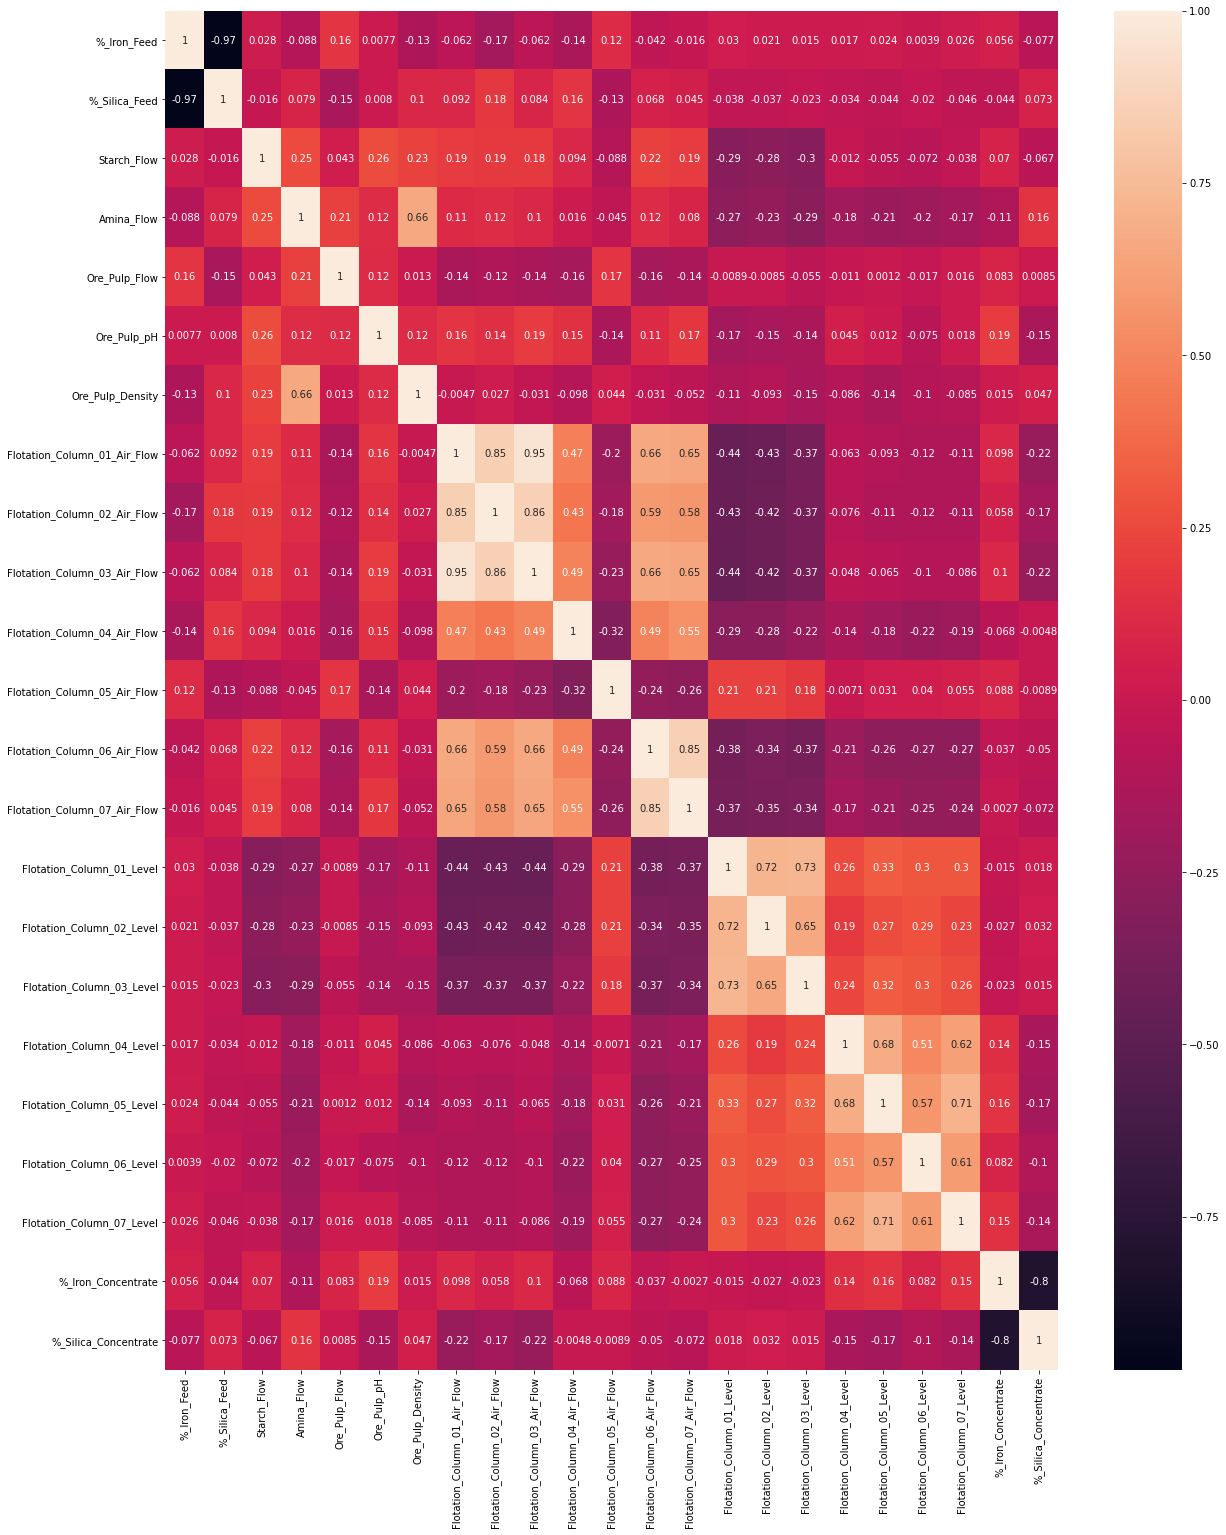

In [10]:
plt.figure(figsize=(20, 25))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [11]:
df.shape

(736282, 24)

In [0]:
df.drop(['%_Iron_Concentrate', 'Ore_Pulp_pH', 'Flotation_Column_01_Air_Flow', 'Flotation_Column_02_Air_Flow', 'Flotation_Column_03_Air_Flow'],axis=1, inplace=True)

In [20]:
df.drop(['date'],axis =1,inplace=True)

KeyError: ignored

In [0]:
y = df['%_Silica_Concentrate'].values
x = df.drop(['%_Silica_Concentrate'], axis=1).values

In [22]:
df.shape

(736282, 18)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [0]:
x = sc.fit_transform(x)


In [25]:
x.shape

(736282, 17)

In [26]:
y.shape

(736282,)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [32]:
model = RandomForestRegressor(n_estimators=50)
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [33]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
pred = model.predict(x_test)
error = mean_squared_error(y_test, pred)
error

0.09038591985774619

In [0]:
import pickle
#saving the model
filename  = 'qualityPrediction.pkl'
pickle.dump(model, open(filename, 'wb'))
